In [113]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Read data
policy = pd.read_excel('/Users/Jenny/Desktop/COVID19/cleaned/COVID-19 US state policy database 6_10_2020.xlsx', skiprows = range(1, 5))

In [7]:
print(policy.shape)

(51, 68)


In [8]:
policy.columns

Index(['STATE', 'POSTCODE', 'STEMERG', 'CLSCHOOL', 'CLDAYCR', 'CLNURSHM',
       'STAYHOME', 'END_STHM', 'CLBSNS', 'END_BSNS', 'RELIGEX', 'FM_ALL',
       'FM_EMP', 'ALCOPEN', 'GUNOPEN', 'CLREST', 'ENDREST', 'RSTOUTDR',
       'CLGYM', 'ENDGYM', 'CLMOVIE', 'END_MOV', 'EVICINTN', 'EVICENF', 'RNTGP',
       'UTILSO', 'MORGFR', 'SNAPALLO', 'SNAPEBT', 'SNAPSUSP', 'MED1135W',
       'ACAENROL', 'PREVTLHL', 'TLHLAUD', 'TLHLMED', 'RACETEST', 'RACECASE',
       'RACEHOSP', 'RACEDEAT', 'ELECPRCR', 'ENDELECP', 'WTPRD', 'WV_WTPRD',
       'WV_WKSR', 'UIQUAR', 'UICLDCR', 'UIEXTND', 'UIMAXAMT', 'UIMAXEXT',
       'UIMAXDUR', 'UIMAXCAR', 'LMABRN', 'TLHlBUPR', 'EXTOPFL', 'HMDLVOP',
       'TLHLCL24', 'EXCEMORP', 'WVDEAREQ', 'PDSKLV', 'MEDEXP', 'POPDEN18',
       'POP18', 'SQML', 'HMLS19', 'UNEMP18', 'POV18', 'RISKCOV', 'DEATH18'],
      dtype='object')

## Correlation between states 

In [55]:
policyPol = policy[['POSTCODE', 'STEMERG', 'CLSCHOOL','STAYHOME', 'END_STHM', 'CLBSNS', 'END_BSNS', 'FM_ALL',
       'FM_EMP', 'CLREST', 'ENDREST', 'CLGYM', 'ENDGYM', 'CLMOVIE', 'END_MOV', 'EVICINTN', 'EVICENF', 'UTILSO']] 
policyPol.head()

,POSTCODE,STEMERG,CLSCHOOL,STAYHOME,END_STHM,CLBSNS,END_BSNS,FM_ALL,FM_EMP,CLREST,ENDREST,CLGYM,ENDGYM,CLMOVIE,END_MOV,EVICINTN,EVICENF,UTILSO
0,AL,2020-03-13,2020-03-19 00:00:00,2020-04-04 00:00:00,2020-04-30 00:00:00,2020-03-28 00:00:00,2020-04-30 00:00:00,0,2020-05-11 00:00:00,2020-03-19 00:00:00,2020-05-11 00:00:00,2020-03-28 00:00:00,2020-05-11 00:00:00,2020-03-28 00:00:00,2020-05-22 00:00:00,0,2020-04-03 00:00:00,0
1,AK,2020-03-11,2020-03-16 00:00:00,2020-03-28 00:00:00,2020-04-24 00:00:00,2020-03-28 00:00:00,2020-04-24 00:00:00,0,2020-04-24 00:00:00,2020-03-18 00:00:00,2020-04-24 00:00:00,2020-03-18 00:00:00,2020-05-08 00:00:00,2020-03-18 00:00:00,2020-05-08 00:00:00,2020-03-23 00:00:00,0,2020-04-09 00:00:00
2,AZ,2020-03-11,2020-03-16 00:00:00,2020-03-31 00:00:00,2020-05-16 00:00:00,2020-03-30 00:00:00,2020-05-08 00:00:00,0,2020-05-08 00:00:00,2020-03-20 00:00:00,2020-05-11 00:00:00,2020-03-20 00:00:00,2020-05-13 00:00:00,2020-03-20 00:00:00,2020-05-16 00:00:00,0,2020-03-24 00:00:00,0
3,AR,2020-03-11,2020-03-17 00:00:00,0,0,0,2020-05-04 00:00:00,0,2020-05-11 00:00:00,2020-03-19 00:00:00,2020-05-11 00:00:00,2020-03-20 00:00:00,2020-05-04 00:00:00,0,2020-05-18 00:00:00,0,0,2020-04-10 00:00:00
4,CA,2020-03-04,0,2020-03-19 00:00:00,0,2020-03-19 00:00:00,2020-05-08 00:00:00,0,2020-05-05 00:00:00,2020-03-19 00:00:00,0,2020-03-19 00:00:00,0,2020-03-19 00:00:00,0,2020-03-27 00:00:00,0,2020-04-02 00:00:00


In [56]:
# Fix NV's FM_ALL
policyPol.loc[policyPol['POSTCODE']=='NV', 'FM_ALL'] = 0

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
print('There are {} zeros in dataframe'.format((policyPol == 0).sum().sum()))

There are 217 zeros in dataframe


In [58]:
# set 2/1/20 as baseline
policyPol = policyPol.replace(0, datetime.datetime(2020, 2,1))
policyPol

,POSTCODE,STEMERG,CLSCHOOL,STAYHOME,END_STHM,CLBSNS,END_BSNS,FM_ALL,FM_EMP,CLREST,ENDREST,CLGYM,ENDGYM,CLMOVIE,END_MOV,EVICINTN,EVICENF,UTILSO
0,AL,2020-03-13,2020-03-19,2020-04-04,2020-04-30,2020-03-28,2020-04-30,2020-02-01,2020-05-11,2020-03-19,2020-05-11,2020-03-28,2020-05-11,2020-03-28,2020-05-22,2020-02-01,2020-04-03,2020-02-01
1,AK,2020-03-11,2020-03-16,2020-03-28,2020-04-24,2020-03-28,2020-04-24,2020-02-01,2020-04-24,2020-03-18,2020-04-24,2020-03-18,2020-05-08,2020-03-18,2020-05-08,2020-03-23,2020-02-01,2020-04-09
2,AZ,2020-03-11,2020-03-16,2020-03-31,2020-05-16,2020-03-30,2020-05-08,2020-02-01,2020-05-08,2020-03-20,2020-05-11,2020-03-20,2020-05-13,2020-03-20,2020-05-16,2020-02-01,2020-03-24,2020-02-01
3,AR,2020-03-11,2020-03-17,2020-02-01,2020-02-01,2020-02-01,2020-05-04,2020-02-01,2020-05-11,2020-03-19,2020-05-11,2020-03-20,2020-05-04,2020-02-01,2020-05-18,2020-02-01,2020-02-01,2020-04-10
4,CA,2020-03-04,2020-02-01,2020-03-19,2020-02-01,2020-03-19,2020-05-08,2020-02-01,2020-05-05,2020-03-19,2020-02-01,2020-03-19,2020-02-01,2020-03-19,2020-02-01,2020-03-27,2020-02-01,2020-04-02
5,CO,2020-03-11,2020-03-23,2020-03-26,2020-04-27,2020-03-26,2020-05-01,2020-02-01,2020-04-23,2020-03-17,2020-05-27,2020-03-17,2020-06-02,2020-03-17,2020-02-01,2020-02-01,2020-02-01,2020-03-20
6,CT,2020-03-10,2020-03-17,2020-02-01,2020-02-01,2020-03-23,2020-05-20,2020-04-20,2020-04-03,2020-03-16,2020-05-20,2020-03-16,2020-02-01,2020-03-16,2020-02-01,2020-04-10,2020-03-20,2020-03-12
7,DE,2020-03-13,2020-03-16,2020-03-24,2020-06-01,2020-03-24,2020-05-08,2020-04-28,2020-05-01,2020-03-16,2020-06-01,2020-03-19,2020-06-01,2020-03-19,2020-06-01,2020-03-24,2020-03-24,2020-03-24
8,DC,2020-03-11,2020-03-16,2020-04-01,2020-05-29,2020-03-25,2020-05-29,2020-04-15,2020-04-15,2020-03-16,2020-05-29,2020-03-17,2020-02-01,2020-03-17,2020-02-01,2020-02-01,2020-03-15,2020-03-17
9,FL,2020-03-09,2020-03-17,2020-04-03,2020-05-18,2020-02-01,2020-05-18,2020-02-01,2020-05-11,2020-03-20,2020-05-18,2020-03-20,2020-05-18,2020-03-20,2020-02-01,2020-04-02,2020-04-02,2020-02-01


In [68]:
policyPol[['STEMERG', 'CLSCHOOL','STAYHOME', 'END_STHM', 'CLBSNS', 'END_BSNS', 'FM_ALL',
       'FM_EMP', 'CLREST', 'ENDREST', 'CLGYM', 'ENDGYM', 'CLMOVIE', 'END_MOV', 'EVICINTN', 
           'EVICENF', 'UTILSO']] = (policyPol.drop('POSTCODE', axis=1) - datetime.datetime(2020, 2,1)).applymap(lambda x: x.days)

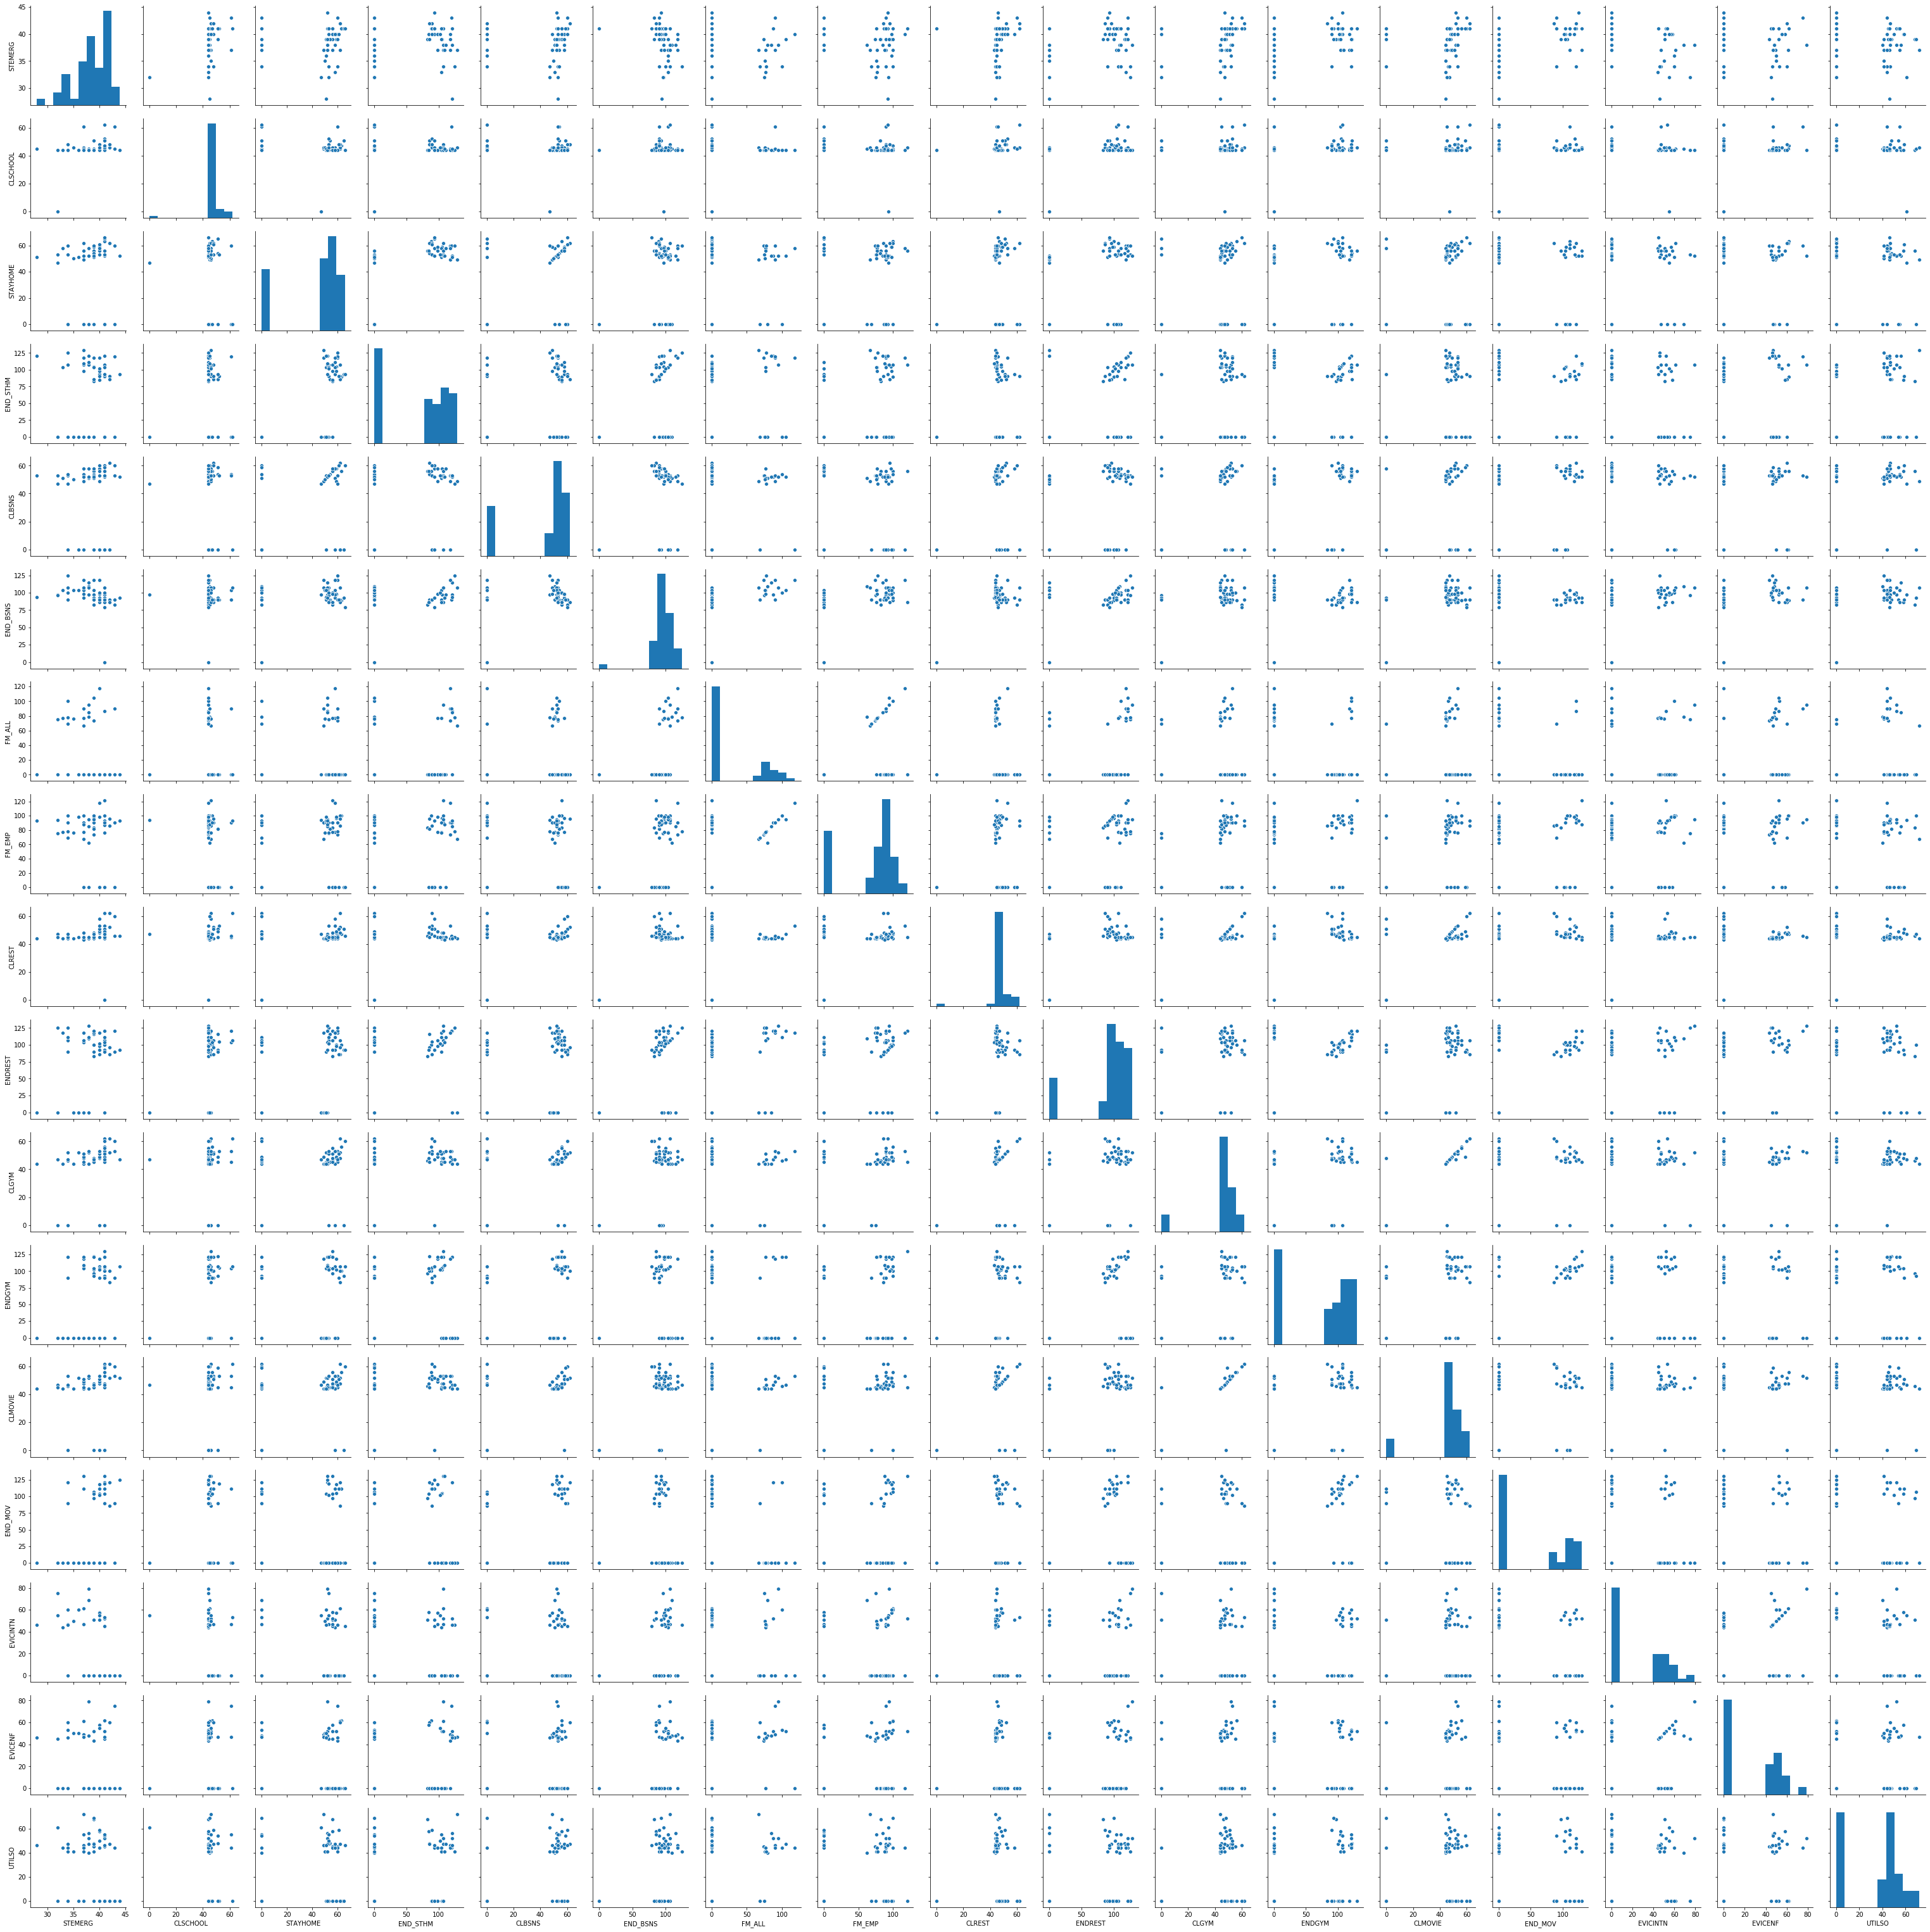

In [72]:
sns.pairplot(policyPol.drop('POSTCODE', axis=1))

There are some groupings in the variables.

In [82]:
# Correlation between states
df_corr = policyPol.transpose()
df_corr.columns = df_corr.iloc[0]
df_corr = df_corr.drop('POSTCODE', axis=0)

In [109]:
df_corr = df_corr.astype(int)
df_corr.corr()

POSTCODE,AL,AK,AZ,AR,CA,CO,CT,DE,DC,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
POSTCODE,,,,,,,,,,,,,,,,,,,,,
AL,1.000000,0.659804,0.986155,0.558823,-0.100909,0.578215,-0.178475,0.664854,0.247606,0.577481,...,-0.164586,0.589778,0.452468,0.520329,0.554081,0.164779,0.129379,0.917054,0.575598,0.720396
AK,0.659804,1.000000,0.707226,0.689082,0.180674,0.657474,-0.198447,0.643336,0.092115,0.430893,...,-0.207089,0.729314,0.413630,0.240465,0.655717,0.111704,0.161200,0.825904,0.630709,0.623214
AZ,0.986155,0.707226,1.000000,0.543312,-0.090507,0.639463,-0.166078,0.720874,0.327180,0.621653,...,-0.175493,0.633283,0.422252,0.502643,0.624306,0.232822,0.206270,0.934860,0.619751,0.683561
AR,0.558823,0.689082,0.543312,1.000000,0.146100,0.482414,0.154968,0.532630,0.035211,0.282739,...,-0.013036,0.459098,0.609797,0.688610,0.416336,0.168556,-0.186568,0.641975,0.339247,0.875420
CA,-0.100909,0.180674,-0.090507,0.146100,1.000000,0.118514,0.335222,-0.310818,0.146906,0.109393,...,-0.207399,-0.185271,-0.159959,-0.223704,0.093718,0.204935,0.529216,-0.042000,-0.288381,0.057501
CO,0.578215,0.657474,0.639463,0.482414,0.118514,1.000000,0.076039,0.478206,0.480324,0.717842,...,-0.062381,0.515214,0.366646,0.239337,0.988113,0.417842,0.221606,0.622028,0.434518,0.489978
CT,-0.178475,-0.198447,-0.166078,0.154968,0.335222,0.076039,1.000000,-0.025496,0.477876,0.151050,...,-0.048517,-0.302799,0.084752,0.296401,0.004881,0.454233,0.005564,-0.208907,-0.176003,0.182849
DE,0.664854,0.643336,0.720874,0.532630,-0.310818,0.478206,-0.025496,1.000000,0.314714,0.458225,...,-0.356176,0.529971,0.301149,0.624026,0.477138,0.364492,-0.067858,0.729720,0.579529,0.544290
DC,0.247606,0.092115,0.327180,0.035211,0.146906,0.480324,0.477876,0.314714,1.000000,0.444524,...,-0.125219,0.155986,-0.132412,0.104245,0.494164,0.871139,0.495717,0.201721,0.106784,0.050726


#### Todo: visualize the corrlation matrix
There are some correlation existing.

## TSNE

In [169]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate=100, 
                 early_exaggeration = 8,
                 perplexity = 45).fit_transform(policyPol.drop('POSTCODE', axis=1).values)

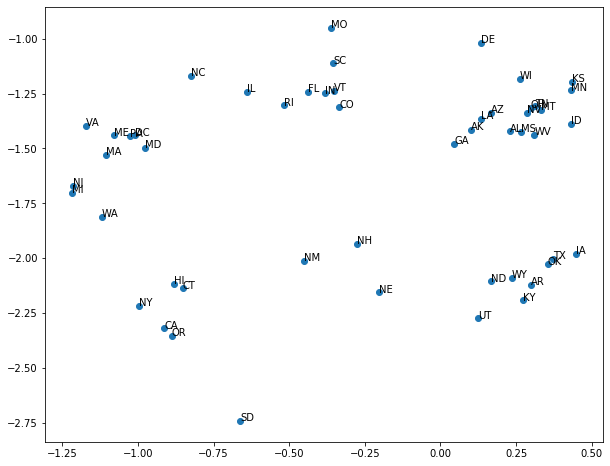

In [173]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1])

#annotation
for idx, state in enumerate(policyPol['POSTCODE']):
    ax.annotate(state, (X_embedded[idx, 0], X_embedded[idx, 1]))

## Clustering

In [175]:
# K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=0).fit(policyPol.drop('POSTCODE', axis=1).values)

In [190]:
# Visualize labels with TSNE features
K_tsne = pd.DataFrame(X_embedded, columns=['tsne1', 'tsne2'])
K_tsne['k_label'] = kmeans.labels_

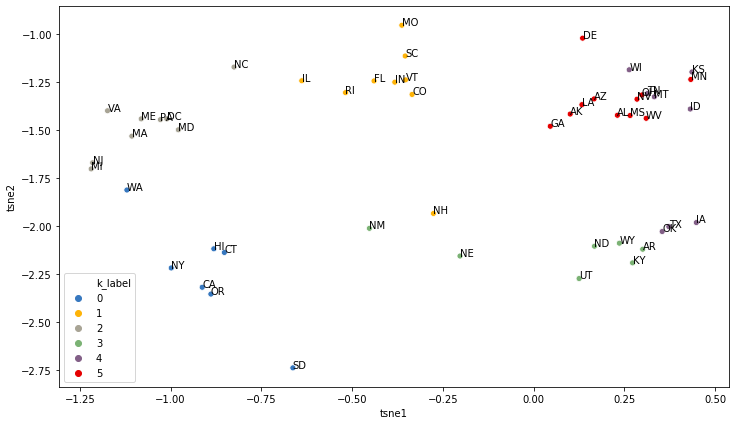

In [266]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple", "red"]
plt.subplots(figsize = (12,7))
ax = sns.scatterplot(x='tsne1', y='tsne2', hue='k_label', data=K_tsne, legend="full", palette=sns.xkcd_palette(colors))

#annotation
for idx, state in enumerate(policyPol['POSTCODE']):
    ax.annotate(state, (K_tsne['tsne1'][idx], K_tsne['tsne2'][idx]))

Clustering is approximately aligned with TSNE with few exceptions

In [299]:
# DBSCAN
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.19, min_samples=2).fit(X_embedded)
db.labels_

array([ 0,  0,  0,  1,  2,  3,  2, -1,  4,  3,  0,  2,  0,  3,  3,  1,  0,
        1,  0,  4,  4,  4,  4,  0,  0,  3,  0, -1,  0, -1,  4, -1,  2, -1,
        1,  0,  1,  2,  4,  3,  3, -1,  0,  1,  1,  3,  4,  4,  0,  0,  1])

In [300]:
DB_tsne = pd.DataFrame(X_embedded, columns=['tsne1', 'tsne2'])
DB_tsne['db_label'] = db.labels_

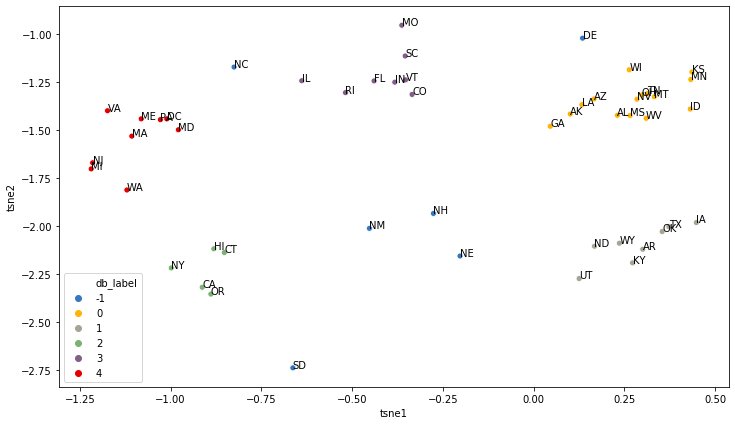

In [301]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple", "red"]
plt.subplots(figsize = (12,7))
ax = sns.scatterplot(x='tsne1', y='tsne2', hue='db_label', data=DB_tsne, legend="full", palette=sns.xkcd_palette(colors))

#annotation
for idx, state in enumerate(policyPol['POSTCODE']):
    ax.annotate(state, (DB_tsne['tsne1'][idx], DB_tsne['tsne2'][idx]))

Use DBSCAN trained on TSNE features. 

In [422]:
# Relabel for better visualization. This was derived from investigation later
labelAssign = {1: 'group0', 0:'group1', 3: 'group2', 4: 'group3', 2: 'group4', -1: 'outliers'}

## Examine policy in each cluster

In [332]:
df = policy[['STAYHOME', 'END_STHM', 'CLBSNS', 'END_BSNS']]
df = df.replace(0, datetime.datetime(2020, 6, 15))

In [341]:
policyPol['sthm_len'] = df['END_STHM'] - df['STAYHOME']
policyPol['sthm_len'] = policyPol['sthm_len'].apply(lambda x: x.days)
policyPol['bsns_len'] = df['END_BSNS'] - df['CLBSNS']
policyPol['bsns_len'] = policyPol['bsns_len'].apply(lambda x: x.days)

In [424]:
# policy length, stayHome and bsns closure
policyPol['cluster'] = db.labels_
policyPol['cluster'] = policyPol['cluster'].map(lambda x: labelAssign[x])

In [425]:
print('stayhome length')
print(policyPol.groupby('cluster')['sthm_len'].mean())

stayhome length
cluster
group0       0.000000
group1      38.066667
group2      43.500000
group3      62.555556
group4      67.800000
outliers    47.333333
Name: sthm_len, dtype: float64


Text(0.5, 1.0, 'Mean of stay home length in each cluster')

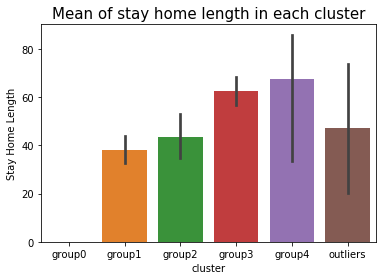

In [429]:
# Visualize 
sns.barplot(x='cluster', y='sthm_len', data=policyPol, order=['group0', 'group1', 'group2', 
                                                              'group3', 'group4', 'outliers'])
plt.ylabel('Stay Home Length')
plt.title('Mean of stay home length in each cluster', size=15)

## Examine SES in each cluster

In [431]:
popden = policy[['POSTCODE', 'POPDEN18']]
popden['cluster'] = db.labels_
popden['cluster'] = popden['cluster'].map(lambda x: labelAssign[x])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [432]:
popden.sort_values(by='cluster')

,POSTCODE,POPDEN18,cluster
50,WY,5.91,group0
15,IA,56.09,group0
36,OK,56.41,group0
43,TX,106.86,group0
34,ND,10.75,group0
44,UT,37.23,group0
3,AR,56.67,group0
17,KY,110.58,group0
42,TN,160.64,group1
35,OH,260.77,group1


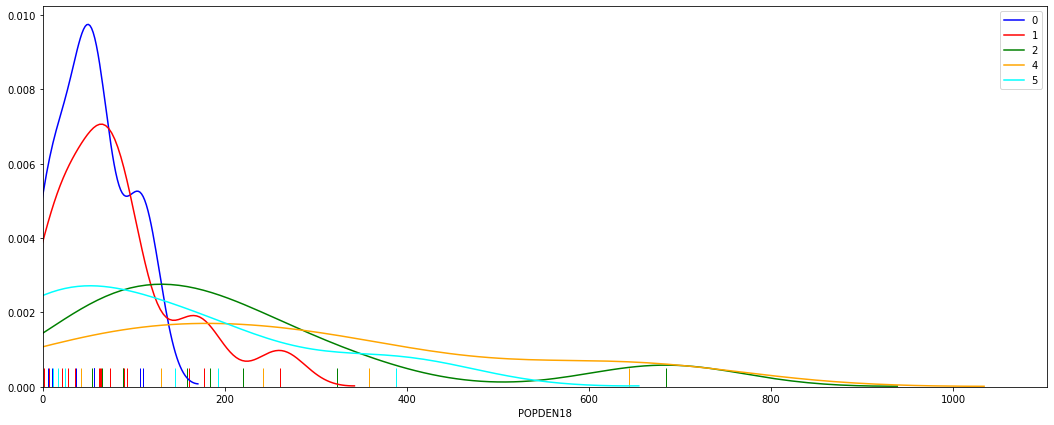

In [436]:
plt.subplots(figsize = (18,7))
colors = ["blue", "red", "green", "black", "orange", "cyan"]
for idx, i in enumerate(['group0', 'group1', 'group2', 'group3', 'group4', 'outliers']):
    if i != 'group3':
        sns.distplot(popden.loc[popden['cluster']==i, 'POPDEN18'], color=colors[idx], hist=False, 
                     rug=True, label=str(idx))
plt.xlim(left=0)
plt.show()

Clusters with smaller population density tend to have a shorter duration of stayhome order. 

Text(0.5, 1.0, 'Mean of population density in each cluster')

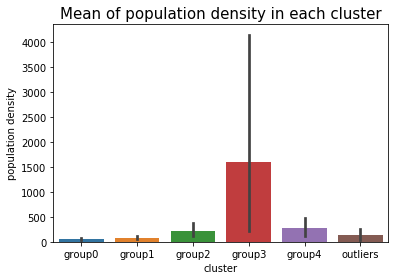

In [437]:
# Visualize through barchart
sns.barplot(x='cluster', y='POPDEN18', data=popden, order=['group0', 'group1', 'group2', 
                                                              'group3', 'group4', 'outliers'])
plt.ylabel('population density')
plt.title('Mean of population density in each cluster', size=15)

## Examine mobility in each cluster

Visualize mobility score with each group (except for -1)

In [438]:
# read mobility data
mobility = pd.read_csv('/Users/Jenny/Desktop/COVID19/cleaned/covid19_us_summary.csv')
mobility.head()

,a_state,a_date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,b_state,b_date,confirmed_cases_state,deaths_state
0,AL,2020-02-15,5,2,39.0,7,2,-1,AL,2020-02-15,0,0
1,AL,2020-02-16,0,-2,-7.0,3,-1,1,AL,2020-02-16,0,0
2,AL,2020-02-17,3,0,17.0,7,-17,4,AL,2020-02-17,0,0
3,AL,2020-02-18,-4,-3,-11.0,-1,1,2,AL,2020-02-18,0,0
4,AL,2020-02-19,4,1,6.0,4,1,0,AL,2020-02-19,0,0


In [439]:
# Join with label data
mobility = mobility.merge(popden[['POSTCODE', 'cluster']], how='left', left_on = 'a_state', right_on='POSTCODE')

In [440]:
mobility['a_date'] = pd.to_datetime(mobility['a_date'])

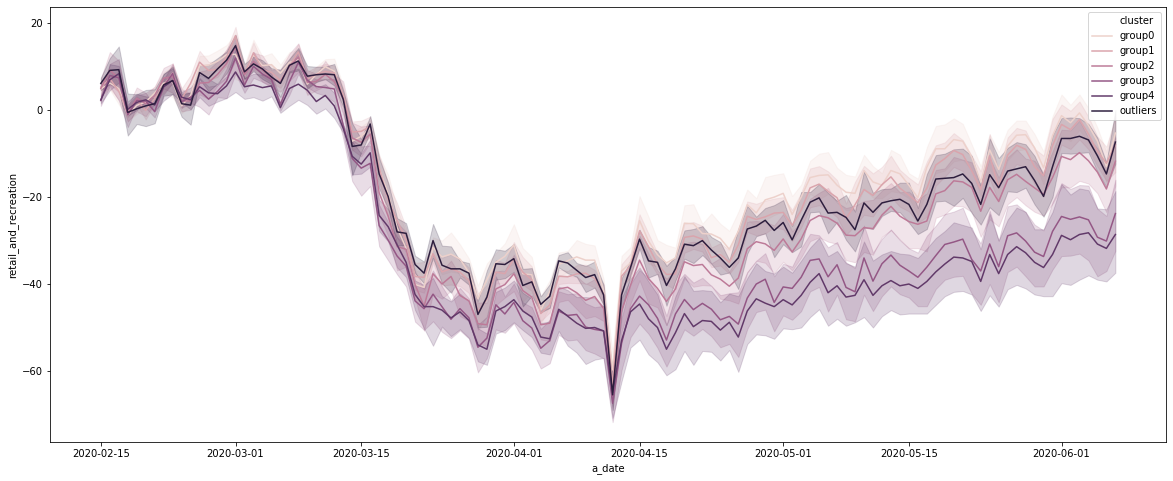

In [446]:
# smooth, change cluster to descending policy 
plt.subplots(figsize=(20,8))
sns.lineplot(x='a_date', y='retail_and_recreation', hue='cluster', hue_order=['group0', 'group1', 'group2', 
                                                              'group3', 'group4', 'outliers'], data=mobility, 
            palette = sns.cubehelix_palette(6))

Text(0.5, 1.0, 'Retail and recreation')

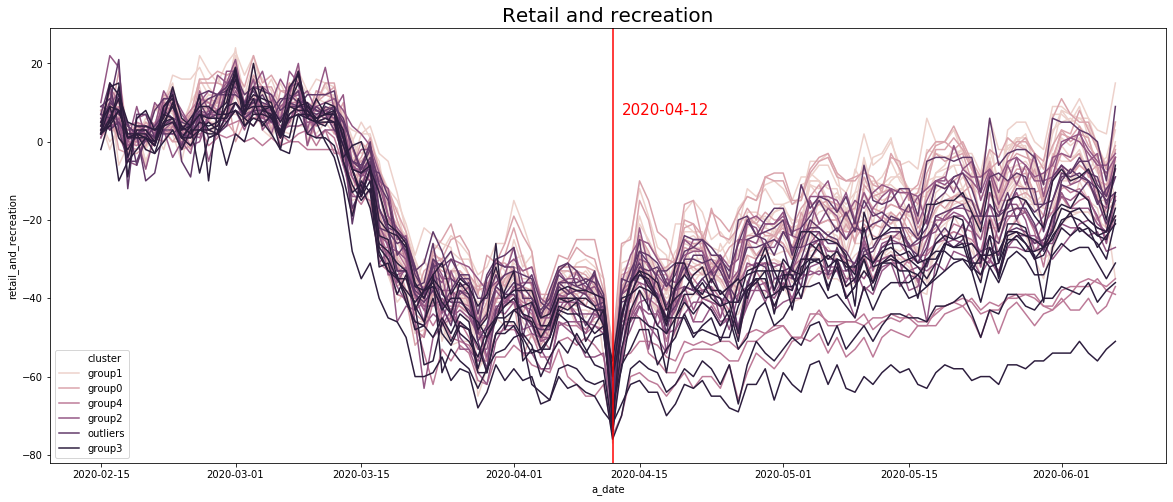

In [449]:
plt.subplots(figsize=(20,8))
sns.lineplot(x='a_date', y='retail_and_recreation', hue='cluster', data=mobility, legend='full', 
             estimator=None, units='a_state', palette = sns.cubehelix_palette(6))
plt.axvline(datetime.datetime(2020,4,12), color='red')
plt.annotate('2020-04-12', xy = (datetime.datetime(2020,4,13),6), xytext=(datetime.datetime(2020,4,13), 7), size=15, color=
            'red')
plt.title('Retail and recreation', size=20)

UndefinedVariableError: name 'group0' is not defined

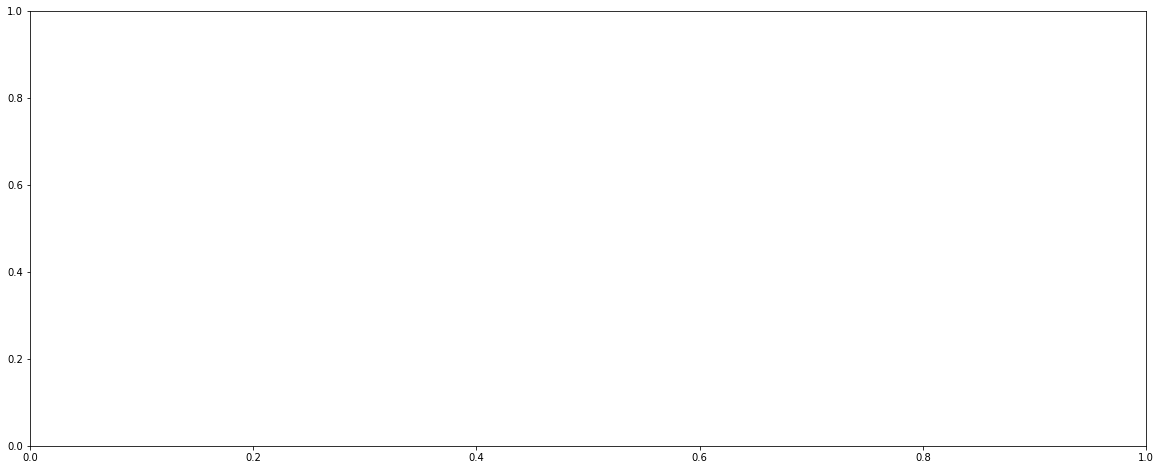

In [460]:
for i in ['group0', 'group1', 'group2', 'group3', 'group4']:
    plt.subplots(figsize=(20,8))
    sns.lineplot(x='a_date', y='retail_and_recreation', data=mobility.query("cluster=={}".format(i)),
                 estimator=None, units='a_state', hue='a_state')
    plt.title('retail and recreation ({})'.format(i), size=20)
    plt.show()